# **ANN**

(1) Design and implement a neural network model to perform binary image classification. The objective is to classify images into two distinct categories — cats and dogs — using a feed-forward neural network approach. Dataset(https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset). (You may need manual feature extraction)

• What were the limitations of FFNNs with high-dimensional image inputs?

(2) Design and implement a back propagation neural network model to perform binary image classification. The objective is to classify images into two distinct categories — cats and dogs.

In [41]:
#Install dependencies
# !pip install opencv-python scikit-learn tensorflow torch

In [42]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
#from google.colab import drive

In [43]:
# Mount Google Drive and set paths
#drive.mount('/content/drive')  # Upload your dataset to Drive
#dataset_path = '/content/drive/MyDrive/dog_and_cat_classification_dataset'  # Adjust this if needed

dataset_path = 'dataset/dog_and_cat_classification_dataset'

# Print the dataset path to verify it
print(f"Dataset path: {dataset_path}")

# Check if the dataset directory exists
if os.path.exists(dataset_path):
    print("Dataset directory found!")
else:
    print(f"Error: Dataset directory not found at {dataset_path}")

Dataset path: dataset/dog_and_cat_classification_dataset
Dataset directory found!


In [44]:
cat_folder = os.path.join(dataset_path, 'Cat')
dog_folder = os.path.join(dataset_path, 'Dog')
if os.path.exists(cat_folder) and os.path.exists(dog_folder):
    print("Cat and Dog subfolders found!")
else:
    print("Error: Cat or Dog subfolders not found. Please check the dataset path and folder structure.")

Cat and Dog subfolders found!


# **TASK 1:**

In [46]:
# Feature extraction function
IMG_SIZE = 128
def extract_features(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
    return hist / np.sum(hist)

In [47]:
# Load images and extract features
X, y = [], []

for folder, label in [(cat_folder, 'cat'), (dog_folder, 'dog')]:
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        image = cv2.imread(img_path)
        if image is not None:
            features = extract_features(image)
            X.append(features)
            y.append(label)

X = np.array(X)
y = np.array(y)

In [48]:
# Encode labels and preprocess features
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Build the Feedforward Neural Network
model = Sequential([
    Dense(256, input_shape=(256,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Imak47\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.5525 - loss: 0.7117 - val_accuracy: 0.4167 - val_loss: 0.9724
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7502 - loss: 0.4865 - val_accuracy: 0.2500 - val_loss: 1.1467
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7994 - loss: 0.4252 - val_accuracy: 0.2500 - val_loss: 1.2929
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8628 - loss: 0.3300 - val_accuracy: 0.3333 - val_loss: 1.4306
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9262 - loss: 0.2773 - val_accuracy: 0.3333 - val_loss: 1.5731
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9262 - loss: 0.2391 - val_accuracy: 0.3333 - val_loss: 1.7520
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9508 - loss: 0.2123 - val_accuracy: 0.3333 - val_loss: 1.9062
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9508 - loss: 0.1865 - val_accuracy: 0.3333 - val_loss: 2.0137

In [51]:
# Evaluate and print results
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=le.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3333 - loss: 3.1944
Test Accuracy: 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

         cat       0.25      0.17      0.20         6
         dog       0.38      0.50      0.43         6

    accuracy                           0.33        12
   macro avg       0.31      0.33      0.31        12
weighted avg       0.31      0.33      0.31        12



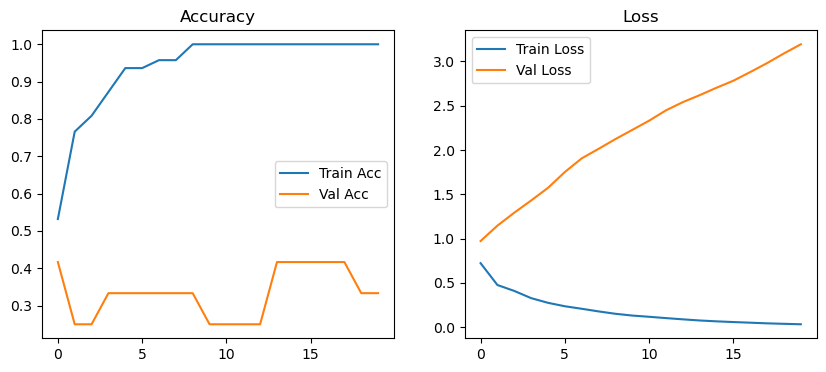

In [52]:
# STEP 10: Plot accuracy and loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

**• What were the limitations of FFNNs with high-dimensional image inputs?**

Limitations of FFNNs with High-Dimensional Images:

1. High computational cost – Too many parameters when flattening large images.

2. No spatial awareness – FFNNs treat pixels independently, ignoring image structure.

3. Manual feature extraction – Can't learn patterns automatically like CNNs.

4. Overfitting – Large networks with limited data often memorize instead of generalize.

5. No translation invariance – Can’t recognize objects in different positions.




---



# **TASK 2:**

In [56]:
# Preprocessing & Manual Feature Extraction
def extract_features(image):
    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
    return hist / np.sum(hist)  # Normalize

In [57]:
# Backpropagation Network (Using Keras)
model = Sequential([
    Dense(256, input_dim=256, activation='relu'),  # Input layer
    Dense(128, activation='relu'),                 # Hidden layer
    Dense(1, activation='sigmoid')                 # Output layer (binary)
])

C:\Users\Imak47\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Compile the model (backprop happens here)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Train (Backpropagation used automatically under the hood)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.4683 - loss: 0.7526 - val_accuracy: 0.2500 - val_loss: 1.0396
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7427 - loss: 0.4795 - val_accuracy: 0.2500 - val_loss: 1.2505
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8240 - loss: 0.3813 - val_accuracy: 0.2500 - val_loss: 1.3048
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8874 - loss: 0.3034 - val_accuracy: 0.2500 - val_loss: 1.3527
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9120 - loss: 0.2538 - val_accuracy: 0.2500 - val_loss: 1.4567
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9470 - loss: 0.2044 - val_accuracy: 0.3333 - val_loss: 1.5598
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9858 - loss: 0.1801 - val_accuracy: 0.3333 - val_loss: 1.6823
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9754 - loss: 0.1556 - val_accuracy: 0.3333 - val_loss: 1.8344

In [60]:
# Evaluation
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4167 - loss: 3.0431
Accuracy: 0.4166666567325592


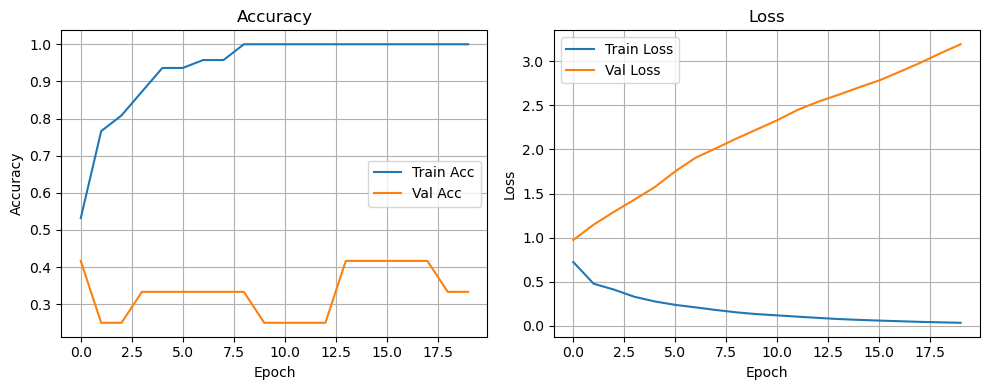

In [61]:
plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



---

